In [474]:
#Anurag Shete
#Chetan Shastry
#Manraj Singh Johal

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import sklearn
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

Objective:

The Data Frame contains two columns named SMS and Labels, objective is to build a framework and experiment with machine learning models to detect spam SMS from a corpus of 5574 messages.

# 1. READING THE DATA

In [307]:
file=open('SMSSpamCollection1')

In [308]:
text=file.readlines()

In [326]:
SMS = []
labels = []
for i in text:
    SMS.append(i.split('\t')[1])
    labels.append(i.split('\t')[0])

    
data = pd.DataFrame(data=np.column_stack([SMS,labels]),columns=['SMS','Labels'])


In [304]:
# Dropping Duplicates
duplicate = data[data.SMS.duplicated()]
data=data.drop_duplicates()
data=data.reset_index()

In [187]:
data['SMS']=data['SMS'].astype(str)

In [64]:
# checking for null values
data.isnull().sum()

SMS       0
Labels    0
dtype: int64

In [327]:
data

,SMS,Labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...\n,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will Ã¼ b going to esplanade fr home?\n,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


# 2. TEXT PREPROCESSING

Goal of text pre-processing is to convert the raw text data into a structured format that can be used for training models and making predictions. 

Methodology:
1.	Remove punctuation, special characters, and digits
2.	Convert the text to lowercase
3.	Tokenize the text into words or sentences
4.	Remove stop words
5.	Stemming or Lemmatization
6.	Convert the tokens into numerical values through vectorization techniques like Count Vectorization, TF-IDF, or Word Embedding
7.	Handle missing values or outliers, if any
8.	Standardize the data


In [280]:
#1. Converting the text into lower cases
for i in range(len(data.SMS)):
    data.SMS[i] = data.SMS[i].lower()

#2. Remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
for i in range(len(data.SMS)):
    data.SMS[i] = " ".join([w for w in data.SMS[i].split() if w not in stop_words])

#3. Remove Punctuations/special symbols and 
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

#Removing punctuation from all the tweets
for i in range(len(data.SMS)):
    data.SMS[i] = data.SMS[i].translate(remv_punc)

#4. Remove white spaces
for i in range(len(data.SMS)):
    data.SMS[i] = data.SMS[i].replace("  ", " ").strip()

#5. Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for i in range(len(data.SMS)):
     data.SMS[i] = " ".join([ps.stem(w) for w in data.SMS[i].split()])

#6 Remove the Numbers from the document
from string import digits
# using translate and digits
# to remove numeric digits from string
for i in range(len(data.SMS)):
    data.SMS[i] = ''.join((w for w in data.SMS[i] if not w.isdigit()))

In [286]:
data # final data ready

,SMS,Labels
0,go jurong point crazi avail bugi n great world...,ham
1,ok lar joke wif u oni,ham
2,free entri wkli comp win fa cup final tkt st ...,spam
3,u dun say earli hor u c alreadi say,ham
4,nah think goe usf live around though,ham
...,...,...
5569,nd time tri contact u u â£ pound prize claim...,spam
5570,ã¼ b go esplanad fr home,ham
5571,piti mood that soani suggest,ham
5572,guy bitch act like id interest buy someth els ...,ham


In [93]:
data_duplicate=data.copy()

In [253]:
data_duplicate

,SMS,Labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...\n,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5166,This is the 2nd time we have tried 2 contact u...,spam
5167,Will Ã¼ b going to esplanade fr home?\n,ham
5168,"Pity, * was in mood for that. So...any other s...",ham
5169,The guy did some bitching but I acted like i'd...,ham


# 3. DATA EXPLORATION

Goal of data exploration is to understand the corpus through visual representations of the data such as word clouds, histograms, or scatter plots to identify patterns and relationships in the data. Further understanding how actually ham and spam SMSs by going few documents in the corpus.

Methodology:
1.	Word cloud of corpus to identify frequent words.
2.	Words which are common in both ham and spam.


In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [39]:
#ham and spam tweets
ham=""
spam=""

for i in range(data.shape[0]):
    if data.Labels[i]=='ham':
        ham=ham+ data.SMS[i]
    else:
        spam=spam+data.SMS[i]

In [40]:
spam

'free entri  wkli comp win fa cup final tkt st may  text fa  receiv entri questionstd txt ratetc appli overfreemsg hey darl  week word back id like fun still tb ok xxx std chg send â£ rcvwinner valu network custom select receivea â£ prize reward claim call  claim code kl valid  hour onlimobil  month more u r entitl updat latest colour mobil camera free call mobil updat co free six chanc win cash   pound txt csh send  cost pday day  tsandc appli repli hl  infourgent  week free membership â£ prize jackpot txt word claim no  tc wwwdbuknet lccltd pobox ldnwarwxxxmobilemovieclub use credit click wap link next txt messag click here httpwap xxxmobilemovieclubcomnqjkgighjjgcblengland v macedonia dont miss goalsteam news txt ur nation team  eg england  trywal scotland txtãº poboxoxwwq thank subscript rington uk mobil charg â£month pleas confirm repli ye no repli charg rodger burn msg tri call repli sm free nokia mobil free camcord pleas call  deliveri tomorrowsm ac sptv new jersey devil detroit

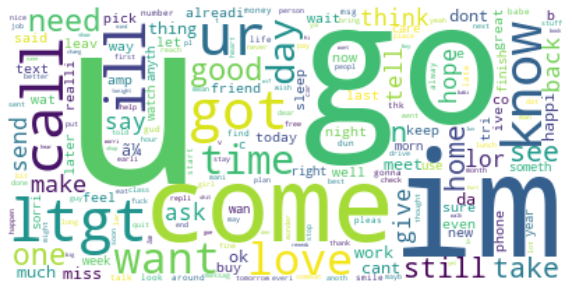

In [41]:
#Wordcloud for legitimate messages
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
From the legitimate 

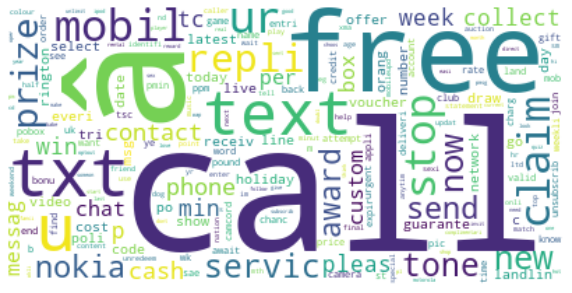

In [42]:
#Wordcloud for spam emails
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the word-cloud, it is observed that for spam emails words  vouchers,award, guarantee, claim,nokia,prize,cash

# 4. VECTORIZATION

Count-Based BOW, also known as Count Vectorization, represents each document in a corpus as a vector of word counts. It's a simple method where each word is treated as a feature and its frequency in the document is counted.
Each dimension represents the count of a specific word in the text.
Methodology:

Input: A collection of documents, called the corpus.

Preprocessing: Perform necessary cleaning and preprocessing steps, such as lowercasing, removing stop words, punctuations, and stemming.

Tokenization: Split the cleaned corpus into individual words or tokens.

Vocabulary creation: Create a vocabulary of all the unique words in the corpus.

Encoding: Assign a numerical value to each word in the vocabulary.

Counting: For each document in the corpus, count the number of occurrences of each word in the vocabulary.

Output: A Document-Term Matrix (DTM), which is a matrix representation of the frequency of each word in each document in the corpus. The rows represent the documents, and the columns represent the words in the vocabulary. Each cell in the matrix represents the frequency of a word in a document.


### 4a) Vectorization using TF

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv= CountVectorizer()
X=np.array(cv.fit_transform(data.SMS).toarray())
names=cv.get_feature_names()
names

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathilov',
 'aathiwher',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abelu',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'about',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'accordinglyor',
 'account',
 'accumul',
 'ach',
 'achanammarakheshqatar',
 'achiev',
 'acid',
 'acknowledg',
 'aclpm',
 'acnt',
 'acoentry',
 'across',
 'acsmsreward',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'addressul',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'admiti',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',

In [45]:
TF=pd.DataFrame(X,columns=names)

In [46]:
TF['Labels']=data.Labels

In [47]:
TF

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zoom,zouk,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharri,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,ham
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


### 4b) Vectorization using TF-IDF

TF-IDF is a weighting scheme reflects the importance of a word in a document relative to the entire corpus. In the TF-IDF model, the term frequency (TF) measures the number of times a word appears in a document, while the inverse document frequency (IDF) measures the rarity of a word in the corpus.
The TF-IDF weight of a word in a document is calculated by multiplying its term frequency with the inverse document frequency. 
This ensures that frequently occurring words in a document receive a lower weight as compared to rare words. This way, the weight of a word in a document reflects its importance with respect to the entire corpus.
Methodology:
    
Data Collection: Collect a corpus of text documents that you want to analyze.
    
Text Pre-processing: Clean and pre-process the text data, which might include removing stop words, punctuation, numbers, converting text to lowercase, stemming or lemmatization, etc.
    
Term Frequency Calculation: Calculate the frequency of each word in each document using the term frequency (TF) method.

Document Frequency Calculation: Calculate the number of documents each word appears in using the document frequency (DF) method.

Inverse Document Frequency Calculation: Calculate the inverse document frequency (IDF) of each word by dividing the total number of documents by the number of documents each word appears in.

TF-IDF Calculation: Calculate the TF-IDF weight for each word in each document by multiplying the TF and IDF values.

Matrix Creation: Create a matrix representation of the documents by using the TF-IDF weights as feature values.

Model Training and Evaluation: Train a machine learning model on the TF-IDF matrix and evaluate its performance using appropriate metrics.


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors= tfidf_vectorizer.fit_transform(data.SMS)

names= tfidf_vectorizer.get_feature_names()

tfidf_vectors=tfidf_vectors.toarray()
TFIDF= pd.DataFrame(tfidf_vectors,columns=names)

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
TFIDF['Labels']=data.Labels
TFIDF

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zoom,zouk,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharri,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,spam
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.384558,0.0,0.0,0.0,0.0,ham
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ham
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,ham


### 4c) Using google's word2vec

Introduction:

Word2vec is embedding technique that is used to convert words into numerical vectors that can be used in machine learning models.
Word2vec can be trained using two different models: skip-gram and continuous bag of words (CBOW). In the skip-gram model, the network is trained to predict the surrounding words given a central word, whereas in the CBOW model, the network is trained to predict the central word given the surrounding words.
One of the key strengths of word2vec is its ability to capture the semantic and syntactic relationships between words. 
Word2vec is computationally efficient, as it can be trained on large corpora of text in a relatively short amount of time.
However, one of the limitations of word2vec is that it is a word-level embedding technique and therefore may not capture the relationships between characters or sub-word information.


Methodology:
    
Input the dataset containing the text data.

Pre-process the text data to remove unwanted characters, stop words, punctuations, etc.

Train a word2vec model on the pre-processed text data.

Convert the words in the text data into numerical vectors (word embeddings) using the trained word2vec model.

Doc2vec: All words in the vector form are converted to a single matrix. 
    
Store the word embeddings as a feature matrix for each text sample in the dataset.

Apply a machine learning model to the feature matrix for text classification or other NLP tasks.

Evaluate the performance of the model and make changes as necessary.


In [50]:
from gensim.models import KeyedVectors

embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [51]:
def vec(a):
    return(embeddings[a])

In [317]:
# Converting each document into a vector
dictionary = {}
index_list = []
for data,index in zip(data.SMS,data.index):
    rev_list = []
    for word in data.split():
        if word in embeddings.index_to_key:
            index_list.append(index)
            rev_list.append(vec(word))
    dictionary[data] = np.sum(np.array(rev_list),axis=0)
index_set = set(index_list)

In [318]:
document_matrix = pd.DataFrame(dictionary).T

In [319]:
word2vec=document_matrix
word2vec.isnull().sum().sum()

0

In [321]:
word2vec['SMS']=word2vec.index
word2vec

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,SMS
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n",0.510864,0.572266,-0.225586,1.908997,0.101364,0.378662,0.333160,-1.492432,0.634705,1.443115,...,-0.386169,-1.406860,1.003174,0.669434,0.215576,0.113770,-0.968018,-0.289555,0.270386,"Go until jurong point, crazy.. Available only ..."
Ok lar... Joking wif u oni...\n,-0.444214,0.313721,0.196777,0.286301,-0.258301,0.088867,-0.367836,-0.137390,-0.182739,0.212158,...,0.510254,-0.703613,-0.204834,-0.358643,-1.170898,-0.495361,-0.475586,-0.283447,0.078369,Ok lar... Joking wif u oni...\n
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n,-0.284691,-1.532684,-1.361450,-0.387939,1.413116,-0.733894,-0.552612,-2.093262,0.968750,2.186707,...,-0.387451,-1.541443,-0.311035,0.067017,-0.118652,-0.572510,-1.266098,-2.019516,-0.437744,Free entry in 2 a wkly comp to win FA Cup fina...
U dun say so early hor... U c already then say...\n,-0.498108,0.425720,1.064545,0.930725,-0.728027,-0.539803,-0.943298,-1.378174,0.058838,0.680664,...,0.616455,-0.450256,-0.191040,-0.505249,-0.493164,-0.668884,-0.094604,0.218506,1.288094,U dun say so early hor... U c already then say...
"Nah I don't think he goes to usf, he lives around here though\n",1.154785,0.684418,0.543762,1.546021,-0.322754,0.082214,0.603638,-1.288574,0.971375,0.882263,...,0.390869,-1.891846,0.387085,-0.676346,-0.312012,0.619873,-1.146332,1.014404,-0.554321,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"This is the 2nd time we have tried 2 contact u. U have won the Â£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.\n",-0.459656,0.297729,1.372604,1.121094,-1.007271,0.131302,0.168671,-1.356201,1.019897,1.764893,...,0.531433,-1.132843,1.004772,-0.486450,-0.600098,-0.544922,-1.074478,0.696526,-0.478760,This is the 2nd time we have tried 2 contact u...
Will Ã¼ b going to esplanade fr home?\n,0.502686,0.516113,0.407043,0.688202,-0.365234,-0.172516,-0.492432,-0.712891,-0.148071,0.281860,...,0.451172,-0.775772,0.702393,-0.110718,-0.442139,-0.211670,-0.705078,-0.057617,0.332336,Will Ã¼ b going to esplanade fr home?\n
"Pity, * was in mood for that. So...any other suggestions?\n",0.360077,0.146790,0.346924,0.127441,-0.286133,-0.265625,-0.404022,-0.448853,0.306641,0.214966,...,-0.170898,-0.179611,0.168457,0.084106,-0.074230,0.042603,0.136108,0.259094,-0.012207,"Pity, * was in mood for that. So...any other s..."
The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free\n,1.639954,1.032698,0.461021,1.690247,-1.105842,0.024048,0.836395,-1.232925,0.976935,2.206055,...,1.301880,-2.438408,0.814514,-0.745007,0.090443,0.911499,-1.189880,0.590385,-1.565552,The guy did some bitching but I acted like i'd...


In [322]:
word2vec.reset_index(level=0, inplace=True)
word2vec

,index,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,SMS
0,"Go until jurong point, crazy.. Available only ...",0.510864,0.572266,-0.225586,1.908997,0.101364,0.378662,0.333160,-1.492432,0.634705,...,-0.386169,-1.406860,1.003174,0.669434,0.215576,0.113770,-0.968018,-0.289555,0.270386,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...\n,-0.444214,0.313721,0.196777,0.286301,-0.258301,0.088867,-0.367836,-0.137390,-0.182739,...,0.510254,-0.703613,-0.204834,-0.358643,-1.170898,-0.495361,-0.475586,-0.283447,0.078369,Ok lar... Joking wif u oni...\n
2,Free entry in 2 a wkly comp to win FA Cup fina...,-0.284691,-1.532684,-1.361450,-0.387939,1.413116,-0.733894,-0.552612,-2.093262,0.968750,...,-0.387451,-1.541443,-0.311035,0.067017,-0.118652,-0.572510,-1.266098,-2.019516,-0.437744,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,-0.498108,0.425720,1.064545,0.930725,-0.728027,-0.539803,-0.943298,-1.378174,0.058838,...,0.616455,-0.450256,-0.191040,-0.505249,-0.493164,-0.668884,-0.094604,0.218506,1.288094,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro...",1.154785,0.684418,0.543762,1.546021,-0.322754,0.082214,0.603638,-1.288574,0.971375,...,0.390869,-1.891846,0.387085,-0.676346,-0.312012,0.619873,-1.146332,1.014404,-0.554321,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,This is the 2nd time we have tried 2 contact u...,-0.459656,0.297729,1.372604,1.121094,-1.007271,0.131302,0.168671,-1.356201,1.019897,...,0.531433,-1.132843,1.004772,-0.486450,-0.600098,-0.544922,-1.074478,0.696526,-0.478760,This is the 2nd time we have tried 2 contact u...
5167,Will Ã¼ b going to esplanade fr home?\n,0.502686,0.516113,0.407043,0.688202,-0.365234,-0.172516,-0.492432,-0.712891,-0.148071,...,0.451172,-0.775772,0.702393,-0.110718,-0.442139,-0.211670,-0.705078,-0.057617,0.332336,Will Ã¼ b going to esplanade fr home?\n
5168,"Pity, * was in mood for that. So...any other s...",0.360077,0.146790,0.346924,0.127441,-0.286133,-0.265625,-0.404022,-0.448853,0.306641,...,-0.170898,-0.179611,0.168457,0.084106,-0.074230,0.042603,0.136108,0.259094,-0.012207,"Pity, * was in mood for that. So...any other s..."
5169,The guy did some bitching but I acted like i'd...,1.639954,1.032698,0.461021,1.690247,-1.105842,0.024048,0.836395,-1.232925,0.976935,...,1.301880,-2.438408,0.814514,-0.745007,0.090443,0.911499,-1.189880,0.590385,-1.565552,The guy did some bitching but I acted like i'd...


In [323]:
word2vec=word2vec.drop('index',axis=1)


In [172]:
word2vec['SMS']=word2vec['SMS'].astype(str)

In [330]:
word2vec1=word2vec.merge(data_duplicate,how="left",on='SMS')

In [336]:
word2vec1.drop('SMS',axis=1,inplace=True)

In [337]:
word2vec1

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,0.510864,0.572266,-0.225586,1.908997,0.101364,0.378662,0.333160,-1.492432,0.634705,1.443115,...,-0.386169,-1.406860,1.003174,0.669434,0.215576,0.113770,-0.968018,-0.289555,0.270386,ham
1,-0.444214,0.313721,0.196777,0.286301,-0.258301,0.088867,-0.367836,-0.137390,-0.182739,0.212158,...,0.510254,-0.703613,-0.204834,-0.358643,-1.170898,-0.495361,-0.475586,-0.283447,0.078369,ham
2,-0.284691,-1.532684,-1.361450,-0.387939,1.413116,-0.733894,-0.552612,-2.093262,0.968750,2.186707,...,-0.387451,-1.541443,-0.311035,0.067017,-0.118652,-0.572510,-1.266098,-2.019516,-0.437744,spam
3,-0.498108,0.425720,1.064545,0.930725,-0.728027,-0.539803,-0.943298,-1.378174,0.058838,0.680664,...,0.616455,-0.450256,-0.191040,-0.505249,-0.493164,-0.668884,-0.094604,0.218506,1.288094,ham
4,1.154785,0.684418,0.543762,1.546021,-0.322754,0.082214,0.603638,-1.288574,0.971375,0.882263,...,0.390869,-1.891846,0.387085,-0.676346,-0.312012,0.619873,-1.146332,1.014404,-0.554321,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,-0.459656,0.297729,1.372604,1.121094,-1.007271,0.131302,0.168671,-1.356201,1.019897,1.764893,...,0.531433,-1.132843,1.004772,-0.486450,-0.600098,-0.544922,-1.074478,0.696526,-0.478760,spam
5167,0.502686,0.516113,0.407043,0.688202,-0.365234,-0.172516,-0.492432,-0.712891,-0.148071,0.281860,...,0.451172,-0.775772,0.702393,-0.110718,-0.442139,-0.211670,-0.705078,-0.057617,0.332336,ham
5168,0.360077,0.146790,0.346924,0.127441,-0.286133,-0.265625,-0.404022,-0.448853,0.306641,0.214966,...,-0.170898,-0.179611,0.168457,0.084106,-0.074230,0.042603,0.136108,0.259094,-0.012207,ham
5169,1.639954,1.032698,0.461021,1.690247,-1.105842,0.024048,0.836395,-1.232925,0.976935,2.206055,...,1.301880,-2.438408,0.814514,-0.745007,0.090443,0.911499,-1.189880,0.590385,-1.565552,ham


In [338]:
word2vec=word2vec1.copy()

# 5. DIMENSION REDUCTION

### 5.1.a) TF- PCA

In [213]:
TF

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zoom,zouk,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharri,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,ham
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [214]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2000)

principalComponents = pca.fit_transform(TF.drop('Labels',axis=1))
np.round(pca.explained_variance_ratio_*100,1)

array([1.7, 1.5, 1.2, ..., 0. , 0. , 0. ])

In [215]:
np.sum(pca.explained_variance_ratio_*100)

95.69377792948833

In [216]:
TF_PCA=pd.DataFrame(principalComponents)

In [217]:
TF_PCA['Labels']=data.Labels

In [218]:
TF_PCA

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Labels
0,0.237190,-0.207160,-0.145284,0.314335,-0.627753,0.606600,0.068155,0.093060,0.079839,-0.132755,...,-0.020591,0.013673,-0.027097,0.001044,-0.018398,-0.000726,-0.004668,0.014146,0.012905,ham
1,0.131159,-0.148865,-0.128757,-0.199839,-0.144560,-0.053264,-0.082097,0.033255,0.137882,0.107426,...,-0.013531,-0.001915,0.029976,-0.000058,-0.036363,-0.002691,-0.025343,0.002244,0.004246,ham
2,-0.540021,0.027734,0.758400,-0.068149,-0.349926,-0.351088,0.037633,0.898041,-0.366485,0.013532,...,-0.007389,0.006367,-0.018745,-0.011429,-0.003179,-0.011584,0.015876,0.009356,0.002996,spam
3,0.173351,-0.054667,-0.115474,-0.143493,-0.100895,-0.046041,-0.048389,-0.010805,0.008012,0.042583,...,0.003313,-0.016919,-0.022725,0.036248,0.018831,-0.019474,0.029580,0.000601,-0.034014,ham
4,0.133844,-0.065344,-0.059823,-0.157443,0.039923,-0.041601,0.021835,0.010359,-0.061482,-0.086459,...,0.008745,0.003097,-0.005357,0.011906,-0.003112,-0.003121,0.008707,-0.008594,0.009542,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,-1.210625,0.128518,-0.416483,0.052539,0.118850,0.209468,-0.064720,-0.361677,0.184034,0.139588,...,0.009200,0.003114,-0.001209,0.001646,0.012813,-0.002187,0.000225,0.002732,-0.003208,spam
5167,0.233740,-0.255685,-0.155037,0.336478,-0.654763,0.537730,0.020303,0.102732,0.163297,-0.052160,...,-0.017596,0.012126,0.004346,-0.009403,-0.008174,0.025078,-0.005603,0.004577,0.006814,ham
5168,0.102807,-0.084005,-0.111014,-0.203899,-0.025959,-0.084404,0.020290,0.020993,-0.047468,-0.047678,...,-0.006580,-0.029487,-0.043124,-0.005583,0.034031,-0.013003,-0.016233,-0.005090,-0.023361,ham
5169,-0.160961,0.042480,0.290938,0.039801,-0.193259,-0.207541,0.099351,0.285252,-0.418933,0.279038,...,0.017796,0.016702,0.023817,-0.012855,0.004580,-0.005386,-0.024826,-0.022138,-0.003966,ham


### 5.1.b) Visualizing the PCA 

In [221]:
import plotly.express as px

pca2 = PCA(n_components=2)

principalComponents2 = pca2.fit_transform(TF.drop('Labels',axis=1))
fig = px.scatter(principalComponents2, x=0, y=1,color = TF["Labels"])
fig.show()

In [128]:
#Trying to fit with scaled data to see if we get better results

In [118]:
scaler = StandardScaler()
TF_scaled = pd.DataFrame(scaler.fit_transform(TF.drop('Labels',axis=1)),columns=[names])

In [119]:
TF_scaled


,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zogtoriu,zoom,zouk,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharri
0,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
1,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
2,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
3,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
4,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
5570,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,5.470130,-0.018946,-0.09184,-0.013395,-0.013395
5571,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395
5572,-0.013395,-0.023206,-0.013395,-0.013395,-0.023206,-0.023206,-0.013395,-0.013395,-0.013395,-0.013395,...,-0.013395,-0.013395,-0.013395,-0.013395,-0.013395,-0.117282,-0.018946,-0.09184,-0.013395,-0.013395


In [126]:
pca = PCA(n_components=2000)

principalComponents = pca.fit_transform(TF_scaled)
np.round(pca.explained_variance_ratio_*100,1)

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



array([0.4, 0.3, 0.3, ..., 0. , 0. , 0. ])

In [127]:
np.sum(pca.explained_variance_ratio_*100)

85.4210189534399

In [129]:
#With scaled data, we got much lesser explained variance thus we wont use it.

### 5.1.c) Heuristic Approach

In [222]:
list(TF)

['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathilov',
 'aathiwher',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abelu',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'about',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'accordinglyor',
 'account',
 'accumul',
 'ach',
 'achanammarakheshqatar',
 'achiev',
 'acid',
 'acknowledg',
 'aclpm',
 'acnt',
 'acoentry',
 'across',
 'acsmsreward',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'addressul',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'admiti',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',

In [223]:
#Remove terms that is contained in less than 0.5% of the documents
TF_HEU=TF.copy()
TF_HEU=TF_HEU.drop('Labels',axis=1)

In [225]:
for col in list(TF_HEU):
    prop=TF_HEU[col].sum()/TF_HEU.shape[0]
    if prop*100<0.5:
        TF_HEU=TF_HEU.drop([col],axis=1)

In [367]:
TF_HEU['Labels']=data_duplicate.Labels

SO NOW WE HAVE 3 DATASETS READY FOR TF-VECTORIZATION:
1. TF
2. TF_PCA (n_components=2000)
3. TF_HEU (dropping words which are in less than 1% documents)

### 5.2.a) TFIDF_PCA

In [227]:
pca = PCA(n_components=2600)

principalComponents = pca.fit_transform(TFIDF.drop('Labels',axis=1))
print(np.round(pca.explained_variance_ratio_*100,1))
print('Explained variance:',np.sum(pca.explained_variance_ratio_*100))

[0.7 0.6 0.5 ... 0.  0.  0. ]
Explained variance: 95.13855915266501


In [228]:
TFIDF_PCA=pd.DataFrame(principalComponents)
TFIDF_PCA['Labels']=data.Labels

In [229]:
TFIDF_PCA

,0,1,2,3,4,5,6,7,8,9,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,Labels
0,-0.043198,0.000014,0.014277,-0.093325,-0.022688,-0.054854,0.041545,-0.011343,0.023180,-0.004955,...,-0.002939,-0.008185,-0.004657,0.003258,-0.006246,-0.005928,0.003236,0.000042,-0.002953,ham
1,-0.093801,0.224608,-0.111669,0.034724,-0.026852,0.001393,-0.038766,0.022362,-0.030614,0.000675,...,-0.005432,-0.004506,0.003408,0.005995,0.003779,0.008300,-0.003126,0.007784,0.003037,ham
2,0.059042,-0.016240,-0.021882,-0.018644,0.030933,-0.062426,-0.114631,-0.006309,-0.052439,-0.082861,...,-0.001469,-0.003791,0.010050,-0.002614,0.007466,-0.005777,0.003429,-0.011994,-0.013166,spam
3,-0.048464,-0.003429,-0.025774,-0.052813,-0.009158,-0.032457,0.039627,0.031950,-0.044916,0.038234,...,0.005943,-0.009212,0.013583,-0.023228,-0.003505,0.005020,-0.013193,0.014715,-0.001583,ham
4,-0.023741,-0.051277,-0.024790,0.021992,-0.002431,0.005969,0.014237,0.005715,-0.014915,0.024556,...,-0.004136,0.001997,-0.000107,0.005422,0.006746,0.002069,0.004871,0.000669,-0.001820,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.284340,0.096833,0.046639,-0.086444,0.039740,0.065991,-0.020170,0.026628,0.069690,0.155668,...,-0.006275,0.002535,0.001345,0.000753,0.002087,0.002658,-0.002274,-0.001096,0.000999,spam
5167,-0.121702,0.077913,0.199491,-0.180334,-0.051280,-0.060729,0.013274,0.022315,0.128638,-0.079689,...,-0.000557,0.005182,0.005557,-0.000532,0.003133,-0.001226,-0.005100,-0.007864,0.005222,ham
5168,-0.010865,-0.027254,-0.039380,-0.001420,0.006342,-0.006432,0.022566,0.008128,-0.021848,0.017854,...,-0.000977,0.003699,-0.009972,-0.003002,0.001289,-0.019414,0.003089,0.005252,0.005699,ham
5169,0.014389,-0.027569,-0.019833,-0.000414,0.036787,-0.061204,-0.031799,0.023754,-0.030220,-0.009018,...,-0.004715,0.002857,-0.006271,-0.004160,0.001918,0.002703,0.004034,-0.006314,-0.002198,ham


### 5.2.b) Visualizing the PCA 

In [232]:
pca2 = PCA(n_components=2)

principalComponents2 = pca2.fit_transform(TFIDF.drop('Labels',axis=1))
fig = px.scatter(principalComponents2, x=0, y=1,color = TF["Labels"])
fig.show()

### 5.2.c) Heuristic Methods

In [233]:
#Remove terms that is contained in less than 0.5% of the documents
TFIDF_HEU=TFIDF.copy()
TFIDF_HEU=TFIDF_HEU.drop('Labels',axis=1)
for col in list(TFIDF_HEU):
    prop=TFIDF_HEU[col].sum()/TFIDF_HEU.shape[0]
    if prop*100<0.5:
        TFIDF_HEU=TFIDF_HEU.drop([col],axis=1)

In [234]:
TFIDF_HEU['Labels']=data.Labels
TFIDF_HEU

,ask,back,call,cant,come,da,day,dear,dont,free,...,want,wat,way,week,well,work,yeah,you,ã¼,Labels
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.194606,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,ham
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,ham
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123214,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,spam
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,ham
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.169261,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,spam
5167,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.384558,ham
5168,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,ham
5169,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.189541,...,0.0,0.000000,0.0,0.216848,0.0,0.0,0.0,0.0,0.000000,ham


WE HAVE 3 DATASETS READY FOR TFIDF-VECTORIZATION:

1.TFIDF

2.TFIDF_PCA (n_components=2600)

3.TFIDF_HEU (dropping words which are in less than 1% documents)

### 5.3.a) WORD2VEC_PCA

In [238]:
pca = PCA(n_components=170)

principalComponents = pca.fit_transform(word2vec.drop('Labels',axis=1))
print(np.round(pca.explained_variance_ratio_*100,1))
print('Explained variance:',np.sum(pca.explained_variance_ratio_*100))

[38.7 10.3  4.8  3.8  2.6  1.9  1.3  1.1  1.   0.9  0.9  0.8  0.7  0.6
  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1]
Explained variance: 95.05660140053763


In [239]:
word2vec_PCA=pd.DataFrame(principalComponents)
word2vec_PCA

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-0.382881,1.569031,-0.289755,-4.183932,0.789298,0.669394,0.975410,-1.686346,1.111125,-1.298688,...,-0.001515,-0.738950,-0.184729,-0.277173,-0.149137,-0.001343,0.442656,0.336755,-0.342735,-0.769091
1,-5.924686,1.500792,3.619169,-1.027170,-1.202583,0.287973,0.527105,0.296591,-0.406995,-0.272197,...,-0.270143,0.416075,-0.171844,-0.076961,0.035965,0.238606,-0.161341,-0.148748,-0.363208,-0.051431
2,0.266080,6.328133,-4.466071,-8.397422,1.430871,-0.517913,-2.982485,-1.911108,1.719613,1.762339,...,-0.043218,-1.148195,0.289619,-0.313259,0.048928,-0.729253,-0.221105,-0.234050,-0.840176,-0.074389
3,-3.828258,1.236717,1.845425,-0.999541,2.393176,-1.670654,1.032522,-0.680577,0.129244,1.558883,...,-0.596831,-0.092619,-0.364977,0.043166,-0.194465,-0.133795,-0.002487,-0.277876,-0.054220,-0.352027
4,1.882634,-3.436427,2.509806,2.225353,1.008714,0.581111,0.262295,-0.617000,-0.812778,0.640954,...,-0.020588,0.326602,-0.051109,0.293408,-0.137243,-0.189532,-0.514706,-0.127849,-0.065583,-0.309700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,3.682547,-0.415709,-5.338789,-2.840969,5.721647,-1.223022,0.047388,0.664869,-0.132462,3.719377,...,0.199301,0.160005,-0.140967,0.139853,0.539956,-0.474506,0.229396,-0.192452,0.240664,-0.332167
5167,-6.428282,0.729344,1.193443,-1.464954,0.246793,-0.526898,1.009960,-0.424766,0.577691,1.217736,...,0.191157,0.261215,-0.128693,-0.103892,0.125161,0.167584,0.224798,0.178959,-0.187056,-0.040912
5168,-6.818169,-1.385759,-1.178602,0.085985,1.865921,0.393315,0.456247,0.437240,0.063457,-0.386805,...,-0.034399,0.347410,-0.000784,-0.304300,-0.207435,-0.086823,-0.212672,0.071310,-0.165176,0.049276
5169,10.162664,-5.927257,-2.058657,2.065745,3.895692,-0.466546,-0.892482,-0.730798,-1.336282,0.714012,...,0.190065,-0.599891,-0.044590,-0.130685,-0.806029,-0.281487,0.015856,0.018641,-0.164218,-0.167383


In [240]:
word2vec_PCA['Labels']=np.array(word2vec.Labels)

In [241]:
word2vec_PCA

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,Labels
0,-0.382881,1.569031,-0.289755,-4.183932,0.789298,0.669394,0.975410,-1.686346,1.111125,-1.298688,...,-0.738950,-0.184729,-0.277173,-0.149137,-0.001343,0.442656,0.336755,-0.342735,-0.769091,ham
1,-5.924686,1.500792,3.619169,-1.027170,-1.202583,0.287973,0.527105,0.296591,-0.406995,-0.272197,...,0.416075,-0.171844,-0.076961,0.035965,0.238606,-0.161341,-0.148748,-0.363208,-0.051431,ham
2,0.266080,6.328133,-4.466071,-8.397422,1.430871,-0.517913,-2.982485,-1.911108,1.719613,1.762339,...,-1.148195,0.289619,-0.313259,0.048928,-0.729253,-0.221105,-0.234050,-0.840176,-0.074389,spam
3,-3.828258,1.236717,1.845425,-0.999541,2.393176,-1.670654,1.032522,-0.680577,0.129244,1.558883,...,-0.092619,-0.364977,0.043166,-0.194465,-0.133795,-0.002487,-0.277876,-0.054220,-0.352027,ham
4,1.882634,-3.436427,2.509806,2.225353,1.008714,0.581111,0.262295,-0.617000,-0.812778,0.640954,...,0.326602,-0.051109,0.293408,-0.137243,-0.189532,-0.514706,-0.127849,-0.065583,-0.309700,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,3.682547,-0.415709,-5.338789,-2.840969,5.721647,-1.223022,0.047388,0.664869,-0.132462,3.719377,...,0.160005,-0.140967,0.139853,0.539956,-0.474506,0.229396,-0.192452,0.240664,-0.332167,spam
5167,-6.428282,0.729344,1.193443,-1.464954,0.246793,-0.526898,1.009960,-0.424766,0.577691,1.217736,...,0.261215,-0.128693,-0.103892,0.125161,0.167584,0.224798,0.178959,-0.187056,-0.040912,ham
5168,-6.818169,-1.385759,-1.178602,0.085985,1.865921,0.393315,0.456247,0.437240,0.063457,-0.386805,...,0.347410,-0.000784,-0.304300,-0.207435,-0.086823,-0.212672,0.071310,-0.165176,0.049276,ham
5169,10.162664,-5.927257,-2.058657,2.065745,3.895692,-0.466546,-0.892482,-0.730798,-1.336282,0.714012,...,-0.599891,-0.044590,-0.130685,-0.806029,-0.281487,0.015856,0.018641,-0.164218,-0.167383,ham


### 5.3.b) Visualizing the PCA

In [242]:
pca2 = PCA(n_components=2)

principalComponents2 = pca2.fit_transform(word2vec.drop('Labels',axis=1))
fig = px.scatter(principalComponents2, x=0, y=1,color = TF["Labels"])
fig.show()

We have 2 more datasets ready:
1. word2vec
2. word2vec_PCA (n_components=190)

We have created 8 different datasets for fitting machine learning models
1.	TF- Uses Count Vectorization
2.	TF_PCA (n_components=2000) - Count Vectorization + PCA
3.	TF_HEU (dropping words which are in less than 0.5% documents) - Uses Count Vectorization
4.	TF-IDF - TF-IDF Based BOW
5.	TFIDF_PCA (n_components=2600)  - TF-IDF + PCA
6.	TFIDF_HEU (dropping words which are in less than 0.5% documents)
7.	word2vec
8.	word2vec_PCA

# 6. SPAM FILTERS

We will be fitting the above datasets on the following models:
    
1. Decision Tree
2. Random Forest
3. Gradient Boosting
4. ADABoosting Classifier
5. Bagging
6. Logistic Regression
7. SGDClassifier

##### Pipeline for model fitting

In [362]:
# Load libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score
from sklearn import metrics

def model_fit(data):
    x=data.drop('Labels',axis=1)
    y=data.Labels.map(lambda x:1 if x=='spam' else 0)
    F1=[]
    classifier=[]
    accuracy=[]
    recall=[]
    precision=[]
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,stratify=y)
    dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=4)
    dt.fit(X_train,y_train)
    y_test_pred = dt.predict(X_test)
    
    print("Decision Tree")
    print(classification_report(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=metrics.confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("Decision Tree")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    



    print('-------------------------------------------------------------------------')
    
    print("Logistic Regression")
    logreg=LogisticRegression()
    logreg.fit(X_train,y_train)
    y_test_pred=logreg.predict(X_test)

    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("Logistic Regression")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))

    
    print('-------------------------------------------------------------------------')
    
    print("Gradient Boosting Classifier")
    gbc=GradientBoostingClassifier()
    gbc.fit(X_train,y_train)
    y_test_pred=gbc.predict(X_test)
    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("Gradient Boosting Classifier")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    
    print('-------------------------------------------------------------------------')
    
    print("Random Forest Classifier")
    RF=RandomForestClassifier()
    RF.fit(X_train,y_train)
    y_test_pred=RF.predict(X_test)
   
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("Random Forest Classifier")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    
    print('-------------------------------------------------------------------------')
    
    print("SGDClassifier")
    sdg=SGDClassifier()
    sdg.fit(X_train,y_train)
    y_test_pred=sdg.predict(X_test)
    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("SGDClassifier")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    
    print('-------------------------------------------------------------------------')
    
    print("AdaBoostClassifier")
    ada=AdaBoostClassifier()
    ada.fit(X_train,y_train)
    y_test_pred=ada.predict(X_test)
    
    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("AdaBoostClassifier")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    
    print('-------------------------------------------------------------------------')
    
    print("BaggingClassifier")
    bag=BaggingClassifier()
    bag.fit(X_train,y_train)
    y_test_pred=bag.predict(X_test)
    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("BaggingClassifier")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    
    
    results = {
        "Classifier": classifier,
        "F1": F1,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision
    }
    return pd.DataFrame(results)

## 6.1) Fitting model on TF-Vector data

In [363]:
model_fit(TF)

Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.56      0.95      0.70        77

    accuracy                           0.94      1035
   macro avg       0.78      0.94      0.83      1035
weighted avg       0.96      0.94      0.95      1035

[[900  58]
 [  4  73]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       920
           1       0.85      0.97      0.91       115

    accuracy                           0.98      1035
   macro avg       0.93      0.98      0.95      1035
weighted avg       0.98      0.98      0.98      1035

[[901  19]
 [  3 112]]
[[901  19]
 [  3 112]]
-------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.701923,0.940097,0.939457,0.995575
1,Logistic Regression,0.910569,0.978744,0.979348,0.996681
2,Gradient Boosting Classifier,0.836207,0.963285,0.963597,0.995575
3,Random Forest Classifier,0.863248,0.969082,0.967811,0.997788
4,SGDClassifier,0.916335,0.979710,0.982514,0.994469
5,AdaBoostClassifier,0.858300,0.966184,0.972797,0.988938
6,BaggingClassifier,0.851240,0.965217,0.969697,0.991150


## 6.2) Fitting model on TF_PCA data

In [364]:
model_fit(TF_PCA)

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1023
           1       0.01      0.17      0.03        12

    accuracy                           0.86      1035
   macro avg       0.50      0.52      0.47      1035
weighted avg       0.98      0.86      0.91      1035

[[885 138]
 [ 10   2]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1012
           1       0.03      0.17      0.05        23

    accuracy                           0.85      1035
   macro avg       0.50      0.52      0.48      1035
weighted avg       0.96      0.85      0.90      1035

[[876 136]
 [ 19   4]]
[[876 136]
 [ 19   4]]
-------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.026316,0.857005,0.865103,0.988827
1,Logistic Regression,0.049080,0.850242,0.865613,0.978771
2,Gradient Boosting Classifier,0.040816,0.863768,0.866732,0.995531
3,Random Forest Classifier,0.000000,0.862802,0.864472,0.997765
4,SGDClassifier,0.157025,0.802899,0.870311,0.907263
5,AdaBoostClassifier,0.047619,0.845411,0.864945,0.973184
6,BaggingClassifier,0.089888,0.843478,0.867603,0.966480


## 6.3) Fitting model on TF_HEU data

In [370]:
TF_HEU.Labels.unique()

array(['ham', 'spam'], dtype=object)

In [371]:
model_fit(TF_HEU)

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       948
           1       0.60      0.91      0.72        87

    accuracy                           0.94      1035
   macro avg       0.80      0.93      0.85      1035
weighted avg       0.96      0.94      0.95      1035

[[896  52]
 [  8  79]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       926
           1       0.79      0.95      0.87       109

    accuracy                           0.97      1035
   macro avg       0.89      0.96      0.92      1035
weighted avg       0.97      0.97      0.97      1035

[[899  27]
 [  5 104]]
[[899  27]
 [  5 104]]
-------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.724771,0.942029,0.945148,0.991150
1,Logistic Regression,0.866667,0.969082,0.970842,0.994469
2,Gradient Boosting Classifier,0.814159,0.959420,0.958511,0.996681
3,Random Forest Classifier,0.878049,0.971014,0.975000,0.992257
4,SGDClassifier,0.872587,0.968116,0.980154,0.983407
5,AdaBoostClassifier,0.821138,0.957488,0.967391,0.984513
6,BaggingClassifier,0.806084,0.950725,0.972315,0.971239


## 6.4) Fitting model on TFIDF data

In [372]:
model_fit(TFIDF)

Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       929
           1       0.69      0.86      0.77       106

    accuracy                           0.95      1035
   macro avg       0.84      0.91      0.87      1035
weighted avg       0.95      0.95      0.95      1035

[[889  40]
 [ 15  91]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       954
           1       0.62      1.00      0.76        81

    accuracy                           0.95      1035
   macro avg       0.81      0.97      0.87      1035
weighted avg       0.97      0.95      0.96      1035

[[904  50]
 [  0  81]]
[[904  50]
 [  0  81]]
-------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.767932,0.946860,0.956943,0.983407
1,Logistic Regression,0.764151,0.951691,0.947589,1.000000
2,Gradient Boosting Classifier,0.815789,0.959420,0.959488,0.995575
3,Random Forest Classifier,0.837004,0.964251,0.961661,0.998894
4,SGDClassifier,0.924303,0.981643,0.983607,0.995575
5,AdaBoostClassifier,0.815451,0.958454,0.961415,0.992257
6,BaggingClassifier,0.861660,0.966184,0.975904,0.985619


## 6.5) Fitting model on TFIDF_PCA data

In [377]:
model_fit(TFIDF_PCA)

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1024
           1       0.00      0.00      0.00        11

    accuracy                           0.85      1035
   macro avg       0.49      0.43      0.46      1035
weighted avg       0.98      0.85      0.91      1035

[[884 140]
 [ 11   0]]
-------------------------------------------------------------------------
Logistic Regression


C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1035
           1       0.00      0.00      0.00         0

    accuracy                           0.86      1035
   macro avg       0.50      0.43      0.46      1035
weighted avg       1.00      0.86      0.93      1035

[[895 140]
 [  0   0]]
[[895 140]
 [  0   0]]
-------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1031
           1       0.01      0.25      0.01         4

    accuracy                           0.86      1035
   macro avg       0.50      0.56      0.47      1035
weighted avg       0.99      0.86      0.92      1035

[[892 139]
 [  3   1]]
[[892 139]
 [  3   1]]
-------------------------------------------------------------------------
Random Forest Classifier
              precision    recall  f1-score   suppor

KeyboardInterrupt: 

## 6.6) Fitting model on TFIDF_HEU

In [374]:
model_fit(TFIDF_HEU)

Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1031
           1       0.00      0.00      0.00         4

    accuracy                           0.86      1035
   macro avg       0.50      0.43      0.46      1035
weighted avg       0.99      0.86      0.92      1035

[[891 140]
 [  4   0]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1035
           1       0.00      0.00      0.00         0

    accuracy                           0.86      1035
   macro avg       0.50      0.43      0.46      1035
weighted avg       1.00      0.86      0.93      1035

[[895 140]
 [  0   0]]
[[895 140]
 [  0   0]]
-------------------------------------------------------------------------
Gradient Boosting Classifier


C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1033
           1       0.00      0.00      0.00         2

    accuracy                           0.86      1035
   macro avg       0.50      0.43      0.46      1035
weighted avg       1.00      0.86      0.92      1035

[[893 140]
 [  2   0]]
[[893 140]
 [  2   0]]
-------------------------------------------------------------------------
Random Forest Classifier
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1001
           1       0.03      0.12      0.05        34

    accuracy                           0.84      1035
   macro avg       0.50      0.49      0.48      1035
weighted avg       0.94      0.84      0.88      1035

[[865 136]
 [ 30   4]]
[[865 136]
 [ 30   4]]
-------------------------------------------------------------------------
SGDClassifier
              precision    recall  f1-score   support

           0

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1033
           1       0.00      0.00      0.00         2

    accuracy                           0.86      1035
   macro avg       0.50      0.43      0.46      1035
weighted avg       1.00      0.86      0.92      1035

[[893 140]
 [  2   0]]
[[893 140]
 [  2   0]]
-------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1001
           1       0.01      0.06      0.02        34

    accuracy                           0.84      1035
   macro avg       0.49      0.46      0.47      1035
weighted avg       0.93      0.84      0.88      1035

[[863 138]
 [ 32   2]]
[[863 138]
 [ 32   2]]


,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.000000,0.860870,0.864210,0.995531
1,Logistic Regression,0.000000,0.864734,0.864734,1.000000
2,Gradient Boosting Classifier,0.000000,0.862802,0.864472,0.997765
3,Random Forest Classifier,0.045977,0.839614,0.864136,0.966480
4,SGDClassifier,0.000000,0.864734,0.864734,1.000000
5,AdaBoostClassifier,0.000000,0.862802,0.864472,0.997765
6,BaggingClassifier,0.022989,0.835749,0.862138,0.964246


## 6.7) Fitting model on word2vec

In [375]:
model_fit(word2vec)

Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       902
           1       0.74      0.73      0.73       133

    accuracy                           0.93      1035
   macro avg       0.85      0.85      0.85      1035
weighted avg       0.93      0.93      0.93      1035

[[868  34]
 [ 36  97]]
-------------------------------------------------------------------------
Logistic Regression


C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.99      0.99      0.99       906
           1       0.92      0.93      0.92       129

    accuracy                           0.98      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.98      0.98      0.98      1035

[[895  11]
 [  9 120]]
[[895  11]
 [  9 120]]
-------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       917
           1       0.82      0.92      0.87       118

    accuracy                           0.97      1035
   macro avg       0.91      0.95      0.92      1035
weighted avg       0.97      0.97      0.97      1035

[[894  23]
 [ 10 108]]
[[894  23]
 [ 10 108]]
-------------------------------------------------------------------------
Random Forest Classifier
              precision    recall  f1-score   suppor

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.734848,0.932367,0.962306,0.960177
1,Logistic Regression,0.923077,0.980676,0.987859,0.990044
2,Gradient Boosting Classifier,0.867470,0.968116,0.974918,0.988938
3,Random Forest Classifier,0.884298,0.972947,0.974026,0.995575
4,SGDClassifier,0.922481,0.980676,0.986784,0.991150
5,AdaBoostClassifier,0.859438,0.966184,0.973828,0.987832
6,BaggingClassifier,0.828452,0.960386,0.965480,0.990044


## 6.8) Fitting model on word2vec_PCA

In [376]:
model_fit(word2vec_PCA)

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       929
           1       0.72      0.89      0.79       106

    accuracy                           0.95      1035
   macro avg       0.85      0.92      0.88      1035
weighted avg       0.96      0.95      0.95      1035

[[892  37]
 [ 12  94]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       916
           1       0.84      0.92      0.88       119

    accuracy                           0.97      1035
   macro avg       0.91      0.95      0.93      1035
weighted avg       0.97      0.97      0.97      1035

[[895  21]
 [  9 110]]
[[895  21]
 [  9 110]]
-------------------------------------------------------------------------
Gradient Boosting Classifier


C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.99      0.97      0.98       922
           1       0.80      0.93      0.86       113

    accuracy                           0.97      1035
   macro avg       0.90      0.95      0.92      1035
weighted avg       0.97      0.97      0.97      1035

[[896  26]
 [  8 105]]
[[896  26]
 [  8 105]]
-------------------------------------------------------------------------
Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       943
           1       0.68      0.97      0.80        92

    accuracy                           0.96      1035
   macro avg       0.84      0.96      0.89      1035
weighted avg       0.97      0.96      0.96      1035

[[901  42]
 [  3  89]]
[[901  42]
 [  3  89]]
-------------------------------------------------------------------------
SGDClassifier
              precision    recall  f1-score   support

           0

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.793249,0.952657,0.960172,0.986726
1,Logistic Regression,0.880000,0.971014,0.977074,0.990044
2,Gradient Boosting Classifier,0.860656,0.967150,0.971800,0.991150
3,Random Forest Classifier,0.798206,0.956522,0.955461,0.996681
4,SGDClassifier,0.854839,0.965217,0.972767,0.987832
5,AdaBoostClassifier,0.838174,0.962319,0.967568,0.990044
6,BaggingClassifier,0.854701,0.967150,0.966738,0.996681


In [427]:
# From this section we see that the datasets TF,TFIDF,word2vec and word2vec give the best results.
# Along with the datasets the models Logistic Regression and SGD Classifier and Random Forest in general are giving the best results.

# Hyperparameter Tuning

Our above models might be prone to overfitting or underfitting hence we run gridsearchCV to get the most optimal model

### Pipeline

In [462]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


def best_params(X, y, param_grid, model):
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring='f1',
                               error_score=0, verbose = 10)
    grid_result = grid_search.fit(X, y)
    
    # Printing the Result
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean,stdev,param))

### TF dataset- Logistic Regression

In [395]:
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                    'C' : [100,10,1.0,0.1]}
    

In [396]:
best_params(X_train, y_train,params_logit, LogisticRegression())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.893685 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.887223 (0.022944) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.892297 (0.022544) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.892780 (0.024340) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.885742 (0.023493) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.801011 (0.030161) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.893685 (0.023787) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.805064 (0.028758) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.892780 (0.024340) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.892780 (0.024340) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.801011 (0.030161) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}


### TFIDF Dataset- Logistic Regression

In [402]:
x=TFIDF.drop('Labels',axis=1)
y=TFIDF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                    'C' : [100,10,1.0,0.1]}


In [403]:
best_params(X_train, y_train,params_logit, LogisticRegression())

Fitting 100 folds for each of 10 candidates, totalling 1000 fits
Best: 0.866753 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.851266 (0.144513) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.851266 (0.144513) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.866753 (0.130288) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.675575 (0.207584) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.677480 (0.208366) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.000000 (0.000000) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.851266 (0.144513) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.866753 (0.130288) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.866753 (0.130288) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.000000 (0.000000) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


### Word2Vec-Logistic Regression

In [400]:
x=word2vec.drop('Labels',axis=1)
y=word2vec.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                    'C' : [100,10,1.0,0.1]}

In [401]:
best_params(X_train, y_train,params_logit, LogisticRegression())

Fitting 100 folds for each of 10 candidates, totalling 1000 fits
Best: 0.885627 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.850360 (0.120535) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.885627 (0.112827) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.871174 (0.106793) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.846701 (0.120520) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.844359 (0.124849) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.875476 (0.119191) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.875476 (0.119191) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
0.816521 (0.124369) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.834288 (0.126719) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.820247 (0.121690) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}


### TF- DECISION TREE

In [406]:
params_dtf = {'max_depth': [40, 50, 60, 70], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)


In [407]:
best_params(X_train, y_train,params_dtf, DecisionTreeClassifier())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best: 0.745679 using {'min_samples_leaf': 5, 'max_depth': 40, 'criterion': 'entropy'}
0.649983 (0.060309) with: {'min_samples_leaf': 10, 'max_depth': 40, 'criterion': 'gini'}
0.638223 (0.049211) with: {'min_samples_leaf': 50, 'max_depth': 70, 'criterion': 'entropy'}
0.603182 (0.033515) with: {'min_samples_leaf': 20, 'max_depth': 50, 'criterion': 'entropy'}
0.647036 (0.057710) with: {'min_samples_leaf': 10, 'max_depth': 60, 'criterion': 'gini'}
0.638223 (0.049211) with: {'min_samples_leaf': 50, 'max_depth': 60, 'criterion': 'gini'}
0.745679 (0.059343) with: {'min_samples_leaf': 5, 'max_depth': 40, 'criterion': 'entropy'}
0.729114 (0.068030) with: {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'entropy'}
0.591747 (0.037306) with: {'min_samples_leaf': 20, 'max_depth': 60, 'criterion': 'gini'}
0.648078 (0.042891) with: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
0.638223 (0.049211) with: {'min_samples

### TFIDF- DECISION TREE

In [408]:
params_dtf = {'max_depth': [40, 50, 60, 70], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}
x=TFIDF.drop('Labels',axis=1)
y=TFIDF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [409]:
best_params(X_train, y_train,params_dtf, DecisionTreeClassifier())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best: 0.744378 using {'min_samples_leaf': 5, 'max_depth': 70, 'criterion': 'entropy'}
0.663019 (0.039103) with: {'min_samples_leaf': 20, 'max_depth': 60, 'criterion': 'gini'}
0.744378 (0.041595) with: {'min_samples_leaf': 5, 'max_depth': 70, 'criterion': 'entropy'}
0.673255 (0.039914) with: {'min_samples_leaf': 10, 'max_depth': 60, 'criterion': 'gini'}
0.685653 (0.042430) with: {'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'entropy'}
0.619189 (0.039365) with: {'min_samples_leaf': 50, 'max_depth': 70, 'criterion': 'gini'}
0.740408 (0.041412) with: {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'entropy'}
0.663019 (0.039103) with: {'min_samples_leaf': 20, 'max_depth': 50, 'criterion': 'gini'}
0.663136 (0.047219) with: {'min_samples_leaf': 20, 'max_depth': 40, 'criterion': 'entropy'}
0.623297 (0.038843) with: {'min_samples_leaf': 50, 'max_depth': 40, 'criterion': 'entropy'}
0.674908 (0.041145) with: {'min_samples

### WORD2VEC -DECISION TREE

In [410]:
params_dtf = {'max_depth': [40, 50, 60, 70], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}
x=word2vec.drop('Labels',axis=1)
y=word2vec.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [411]:
best_params(X_train, y_train,params_dtf, DecisionTreeClassifier())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best: 0.726674 using {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
0.686785 (0.047171) with: {'min_samples_leaf': 20, 'max_depth': 60, 'criterion': 'gini'}
0.695863 (0.061037) with: {'min_samples_leaf': 5, 'max_depth': 50, 'criterion': 'gini'}
0.657148 (0.058168) with: {'min_samples_leaf': 50, 'max_depth': 60, 'criterion': 'gini'}
0.726674 (0.059423) with: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
0.657148 (0.058168) with: {'min_samples_leaf': 50, 'max_depth': 70, 'criterion': 'gini'}
0.695385 (0.045276) with: {'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'gini'}
0.704019 (0.048619) with: {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'gini'}
0.691218 (0.041839) with: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'gini'}
0.687717 (0.057924) with: {'min_samples_leaf': 20, 'max_depth': 40, 'criterion': 'entropy'}
0.692790 (0.048786) with: {'min_samples_leaf': 

### TF-SGDClassifier

In [419]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [420]:
best_params(X_train, y_train,grid, SGDClassifier())

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Fitting 6 folds for each of 8 candidates, totalling 48 fits
Best: 0.891586 using {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.0001}
0.891586 (0.036765) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.0001}
0.868329 (0.043681) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.001}
0.671048 (0.033351) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.01}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.1}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 1.0}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 10.0}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 100.0}
0.077047 (0.108960) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'a

### TFIDF- SGDClassifier

In [422]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
x=TFIDF.drop('Labels',axis=1)
y=TFIDF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [423]:
best_params(X_train, y_train,grid, SGDClassifier())

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Fitting 6 folds for each of 8 candidates, totalling 48 fits
Best: 0.815717 using {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.0001}
0.815717 (0.037548) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.0001}
0.332523 (0.048487) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.001}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.01}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 0.1}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 1.0}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 10.0}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'alpha': 100.0}
0.000000 (0.000000) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 1000, 'loss': 'log', 'a

### Word2vec- SGDClassifer

In [448]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1], # learning rate
    'max_iter': [100000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
x=word2vec.drop('Labels',axis=1)
y=word2vec.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [449]:
best_params(X_train, y_train,grid, SGDClassifier())

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



Fitting 6 folds for each of 4 candidates, totalling 24 fits
Best: 0.878878 using {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 100000, 'loss': 'log', 'alpha': 0.0001}
0.878878 (0.017204) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 100000, 'loss': 'log', 'alpha': 0.0001}
0.859765 (0.029208) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 100000, 'loss': 'log', 'alpha': 0.001}
0.859569 (0.037411) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 100000, 'loss': 'log', 'alpha': 0.01}
0.831975 (0.039366) with: {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 100000, 'loss': 'log', 'alpha': 0.1}


### TF- Random Forest

In [450]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20], 
              "min_samples_leaf" : [3,5,7,9], "n_estimators" : [50]}
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [451]:
best_params(X_train, y_train,params_rfc, RandomForestClassifier())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best: 0.296909 using {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_depth': 11}
0.296909 (0.091318) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_depth': 11}
0.156949 (0.069889) with: {'n_estimators': 50, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_depth': 9}
0.080364 (0.035275) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 10, 'max_depth': 7}
0.063790 (0.037508) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_depth': 7}
0.068054 (0.034771) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_depth': 7}
0.203654 (0.079992) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_depth': 13}
0.075868 (0.045092) with: {'n_estimators': 50, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_depth': 7}
0.042121 (0.050640) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_le

### TFIDF- Random Forest

In [452]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20], 
              "min_samples_leaf" : [3,5,7,9], "n_estimators" : [50]}
x=TFIDF.drop('Labels',axis=1)
y=TFIDF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [453]:
best_params(X_train, y_train,params_rfc, RandomForestClassifier())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best: 0.239802 using {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 20, 'max_depth': 11}
0.121107 (0.049857) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_depth': 9}
0.099084 (0.058327) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_depth': 7}
0.239802 (0.062409) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 20, 'max_depth': 11}
0.167319 (0.038770) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_depth': 11}
0.205572 (0.063120) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 15, 'max_depth': 11}
0.205226 (0.068501) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_depth': 13}
0.175309 (0.040171) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_depth': 9}
0.053546 (0.071626) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_

### Word2vec- Random Forest

In [454]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20], 
              "min_samples_leaf" : [3,5,7,9], "n_estimators" : [50]}
x=word2vec.drop('Labels',axis=1)
y=word2vec.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [455]:
best_params(X_train, y_train,params_rfc, RandomForestClassifier())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best: 0.766713 using {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_depth': 11}
0.756842 (0.024803) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 15, 'max_depth': 5}
0.759168 (0.015760) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 15, 'max_depth': 13}
0.764647 (0.023015) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_depth': 5}
0.747232 (0.017629) with: {'n_estimators': 50, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_depth': 7}
0.713033 (0.020347) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 10, 'max_depth': 7}
0.765605 (0.025343) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 15, 'max_depth': 9}
0.722356 (0.019782) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_depth': 7}
0.717121 (0.014245) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_lea

### TF- ADA Boost

In [463]:
## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [100,150,200,250, 300, 350, 400]}
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)

In [464]:
best_params(X_train, y_train,params_adc, AdaBoostClassifier())

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best: 0.853231 using {'n_estimators': 400}
0.834290 (0.005801) with: {'n_estimators': 100}
0.840737 (0.010260) with: {'n_estimators': 150}
0.844414 (0.015658) with: {'n_estimators': 200}
0.843482 (0.011160) with: {'n_estimators': 250}
0.846262 (0.007549) with: {'n_estimators': 300}
0.846878 (0.008756) with: {'n_estimators': 350}
0.853231 (0.002574) with: {'n_estimators': 400}


### TFIDF-ADA Boost

In [466]:
## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [100,150,200,250, 300, 350, 400]}
x=TFIDF.drop('Labels',axis=1)
y=TFIDF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
best_params(X_train, y_train,params_adc, AdaBoostClassifier())

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best: 0.843457 using {'n_estimators': 400}
0.808243 (0.022680) with: {'n_estimators': 100}
0.815149 (0.016062) with: {'n_estimators': 150}
0.829601 (0.010372) with: {'n_estimators': 200}
0.827748 (0.015510) with: {'n_estimators': 250}
0.834384 (0.005056) with: {'n_estimators': 300}
0.842318 (0.013046) with: {'n_estimators': 350}
0.843457 (0.025306) with: {'n_estimators': 400}


### Word2vec- ADA Boost

In [467]:
## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [100,150,200,250, 300, 350, 400]}
x=word2vec.drop('Labels',axis=1)
y=word2vec.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
best_params(X_train, y_train,params_adc, AdaBoostClassifier())

Fitting 3 folds for each of 7 candidates, totalling 21 fits


C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



Best: 0.864506 using {'n_estimators': 250}
0.862788 (0.021741) with: {'n_estimators': 100}
0.859019 (0.028669) with: {'n_estimators': 150}
0.863344 (0.022757) with: {'n_estimators': 200}
0.864506 (0.026173) with: {'n_estimators': 250}
0.862531 (0.021772) with: {'n_estimators': 300}
0.857067 (0.027081) with: {'n_estimators': 350}
0.863142 (0.028591) with: {'n_estimators': 400}


### TF- Bagging

In [469]:
## Tuning Parameters for Bagging Classifier
params_bc = {'n_estimators':[10, 100, 1000]}
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
best_params(X_train, y_train,params_adc, BaggingClassifier())

C:\Users\Fuzzy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 7 candidates, totalling 21 fits


KeyboardInterrupt: 

### TFIDF- Bagging

In [ ]:
params_bc = {'n_estimators':[10, 100, 1000]}
x=TFIDF.drop('Labels',axis=1)
y=TFIDF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
best_params(X_train, y_train,params_adc, BaggingClassifer())

### word2vec- Bagging

In [ ]:
params_bc = {'n_estimators':[10, 100, 1000]}
x=word2vec.drop('Labels',axis=1)
y=word2vec.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.2)
best_params(X_train, y_train,params_adc, BaggingClassifer())

# FINAL MODEL DEPLOYMENT 

### TF LOGISTIC REGRESSION

In [473]:
x=TF.drop('Labels',axis=1)
y=TF.Labels.map(lambda x:1 if x=='spam' else 0)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,stratify=y)
logreg=LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 10)
logreg.fit(X_train,y_train)
y_test_pred=logreg.predict(X_test)
print(classification_report(y_test_pred,y_test))
print(confusion_matrix(y_test_pred,y_test))
cm=confusion_matrix(y_test_pred,y_test)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       923
           1       0.85      0.99      0.91       112

    accuracy                           0.98      1035
   macro avg       0.92      0.98      0.95      1035
weighted avg       0.98      0.98      0.98      1035

[[903  20]
 [  1 111]]
[[903  20]
 [  1 111]]
